In [1]:
import numpy as np
from scipy.linalg import eigh, cholesky

from pylab import hist, plot, show, axis, subplot, xlabel, ylabel, grid

In C:\Users\wenbo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wenbo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wenbo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\wenbo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wenbo\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
def get_impermanent_loss(p1, p2):
    ratio = p1 / p2 if p1 > p2 else p2 / p1
    return 2 * ratio ** (1/2) / (1 + ratio) - 1

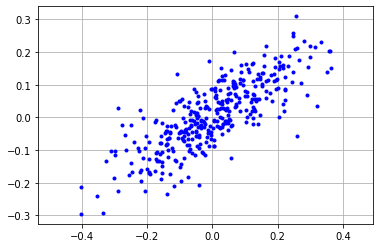

In [3]:
num_samples = 365

# The desired covariance matrix.
corr = 0.57949733
r = np.array([
        [  1, corr],
        [ corr,  1],
    ])

# Generate sample returns
rng = np.random.default_rng()
# RAY
x0 = rng.normal(loc=0.0165917046, scale=0.1572464882, size=num_samples)
# SRM
x1 = rng.normal(loc=0.00691179421, scale=0.08307582878, size=num_samples)

# Convert the data to correlated random variables. 
c = cholesky(r, lower=True)
y = np.dot(c, np.array([x0, x1]))

#
# Plot sanity check the correlation output
#
subplot(1, 1, 1)
plot(y[0], y[1], 'b.')
axis('equal')
grid(True)
show()

In [4]:
a0_prices = np.cumprod(y[0] + 1)
a1_prices = np.cumprod(y[1] + 1)

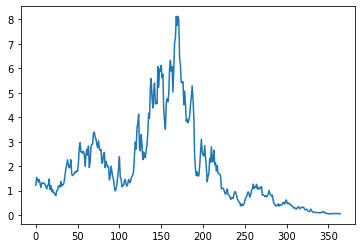

In [5]:
plot(a0_prices)

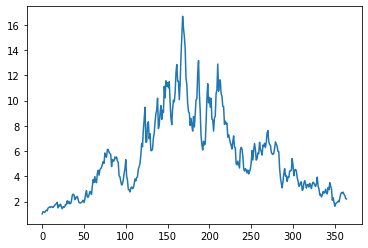

In [6]:
plot(a1_prices)

In [7]:
il = [get_impermanent_loss(a0_price, a1_price) for a0_price, a1_price in zip(a0_prices, a1_prices)]

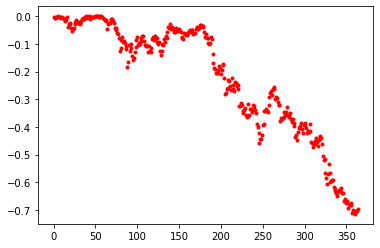

In [8]:
plot(il, 'r.')

In [9]:
# simulate N trials

ils = []
for i in range(1000):
    x0 = rng.normal(loc=0.0165917046, scale=0.1572464882, size=num_samples)
    x1 = rng.normal(loc=0.00691179421, scale=0.08307582878, size=num_samples)
    y = np.dot(c, np.array([x0, x1]))
    a0_prices = np.cumprod(y[0] + 1)
    a1_prices = np.cumprod(y[1] + 1)
    ending_il = get_impermanent_loss(a0_prices[-1], a1_prices[-1])
    ils.append(ending_il)

(array([ 30.,  59.,  77.,  95.,  74.,  77., 105.,  93., 123., 267.]),
 array([-9.41511098e-01, -8.47359995e-01, -7.53208892e-01, -6.59057789e-01,
        -5.64906686e-01, -4.70755582e-01, -3.76604479e-01, -2.82453376e-01,
        -1.88302273e-01, -9.41511700e-02, -6.68511755e-08]),
 <BarContainer object of 10 artists>)

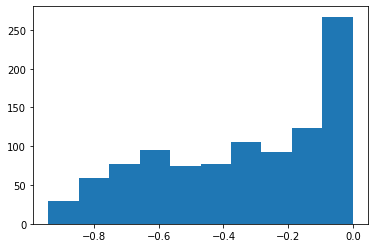

In [10]:
hist(ils)

In [11]:
np.mean(ils)

-0.34122813182952677